# Estudo prático - CNN

#### Sabrina Otoni da Silva - 2023

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Colab Notebooks/fruits.zip'
extract_to_dir = '/content/var'

os.makedirs(extract_to_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

extracted_folders = os.listdir(extract_to_dir)
extracted_folders

['fruits-360_dataset']

In [3]:
training_dir = os.path.join(extract_to_dir, 'fruits-360_dataset/fruits-360', 'Training')
testing_dir = os.path.join(extract_to_dir, 'fruits-360_dataset/fruits-360', 'Test')

training_classes = os.listdir(training_dir)
testing_classes = os.listdir(testing_dir)

num_classes = len(training_classes)
consistent_class_count = len(training_classes) == len(testing_classes)

training_classes, num_classes, consistent_class_count

(['Tomato Yellow',
  'Avocado ripe',
  'Banana',
  'Mulberry',
  'Apple Golden 2',
  'Physalis with Husk',
  'Grape Blue',
  'Onion Red Peeled',
  'Beetroot',
  'Potato White',
  'Papaya',
  'Pear',
  'Peach Flat',
  'Pear Red',
  'Cherry 1',
  'Cherry Rainier',
  'Huckleberry',
  'Nut Forest',
  'Pitahaya Red',
  'Potato Red',
  'Tomato 2',
  'Raspberry',
  'Potato Red Washed',
  'Nectarine',
  'Apple Braeburn',
  'Kohlrabi',
  'Pineapple',
  'Cantaloupe 1',
  'Peach',
  'Hazelnut',
  'Dates',
  'Tomato Cherry Red',
  'Grapefruit White',
  'Grape White 3',
  'Mangostan',
  'Cherry 2',
  'Grape White',
  'Blueberry',
  'Peach 2',
  'Grape Pink',
  'Pear Forelle',
  'Pepper Green',
  'Mango',
  'Kaki',
  'Limes',
  'Lemon Meyer',
  'Tomato Maroon',
  'Orange',
  'Apple Red Yellow 1',
  'Ginger Root',
  'Clementine',
  'Pepper Red',
  'Passion Fruit',
  'Walnut',
  'Pomegranate',
  'Nut Pecan',
  'Cherry Wax Red',
  'Mandarine',
  'Apple Red Yellow 2',
  'Quince',
  'Strawberry Wedge',
 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
target_size = (30, 30)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20)

#criando um gerador que le as imagens do training_dir especificado, e aplicando a transformação de escala para gerar lotes de dados de treinamento.
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

train_generator.image_shape, validation_generator.image_shape, test_generator.image_shape

Found 48431 images belonging to 120 classes.
Found 12067 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


((30, 30, 3), (30, 30, 3), (30, 30, 3))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

num_classes = 120

model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(30, 30, 3)),
    AveragePooling2D(pool_size=(2, 2)),

    Conv2D(64, (5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.5),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ReduceLROnPlateau no livro

es = EarlyStopping(
        min_delta=1e-4,
        verbose=1,
        restore_best_weights=True,
        patience=6
    )


checkpoint = ModelCheckpoint(
    'model_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, es]
)

Epoch 1/10
1514/1514 [==============================] - 39s 23ms/step - loss: 1.9434 - accuracy: 0.4436 - val_loss: 0.5529 - val_accuracy: 0.8400
Epoch 2/10
   8/1514 [..............................] - ETA: 24s - loss: 0.9138 - accuracy: 0.6680

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1514/1514 [==============================] - 34s 22ms/step - loss: 0.7216 - accuracy: 0.7557 - val_loss: 0.4596 - val_accuracy: 0.8638
Epoch 3/10
1514/1514 [==============================] - 40s 26ms/step - loss: 0.5043 - accuracy: 0.8263 - val_loss: 0.3191 - val_accuracy: 0.9013
Epoch 4/10
1514/1514 [==============================] - 37s 24ms/step - loss: 0.3960 - accuracy: 0.8625 - val_loss: 0.2636 - val_accuracy: 0.9364
Epoch 5/10
1514/1514 [==============================] - 34s 22ms/step - loss: 0.3312 - accuracy: 0.8852 - val_loss: 0.3258 - val_accuracy: 0.9345
Epoch 6/10
1514/1514 [==============================] - 33s 22ms/step - loss: 0.2922 - accuracy: 0.9008 - val_loss: 0.3274 - val_accuracy: 0.9424
Epoch 7/10
1514/1514 [==============================] - 34s 23ms/step - loss: 0.2578 - accuracy: 0.9119 - val_loss: 0.3119 - val_accuracy: 0.9469
Epoch 8/10
1514/1514 [==============================] - 34s 23ms/step - loss: 0.2237 - accuracy: 0.9231 - val_loss: 0.3280 - val_accura

In [11]:
model.load_weights('model_best.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')

20622/20622 [==============================] - 77s 4ms/step - loss: 0.2116 - accuracy: 0.9572
Test accuracy: 0.96, Test loss: 0.21


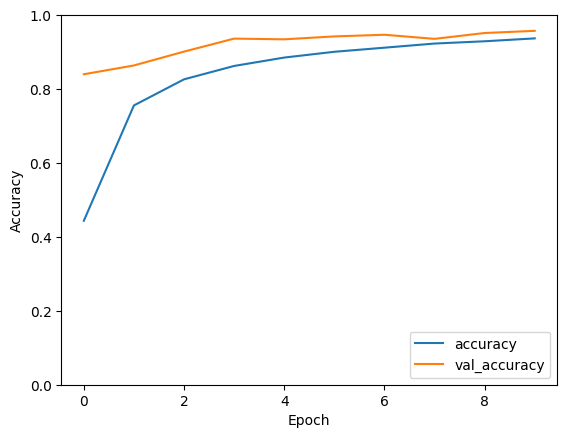

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

In [18]:
import numpy as np
from keras.preprocessing import image

img_path = '/content/var/fruits-360_dataset/fruits-360/Test/Tomato 4/119_100.jpg'
img = image.load_img(img_path, target_size=(30, 30))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)

1/1 [==============================] - 0s 31ms/step
[116]


In [19]:
train_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Dates': 35,
 'Eggplant': 36,
 'Ginger Root': 37,
 'Granadilla': 38,
 'Grape Blue': 39,
 'Grape Pink': 40,
 'Grape White': 41,
 'Grape White 2': 42,
 'Grape White 3': 43,
 'Grape White 4': 44,
 'Grapefruit Pink': 45,
 'Grapefruit White': 46,
 'Guava': 47,
 'Hazelnut